### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv("hw4/elections_scrape.csv")
df.head(5)

,ТИК,УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна
0,1,1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120
1,1,2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46
2,1,3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96
3,1,4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71
4,1,5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82


In [13]:
#Переименуем колонки для более удобного обращения
df = df.rename(columns={"ТИК" : 'tik','УИК' : 'uik',"Число избирателей, внесенных в список избирателей на момент окончания голосования" : 'wholeNumOfElectors',"Число избирательных бюллетеней, полученных участковой избирательной комиссией" : 'wholeNumOfBallots',"Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования" : 'givenBallotsInside',"Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования" : 'givenBallotsOutside', 'Число погашенных избирательных бюллетеней' : 'ejectedBallots', "Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования" : 'submittedBallotsOutside',"Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования" : 'submittedBallotsInside', 'Число недействительных избирательных бюллетеней' : 'spoiledBallots', 'Число действительных избирательных бюллетеней' : 'validBallots', 'Число утраченных избирательных бюллетеней' : 'lostBallots', "Число избирательных бюллетеней, не учтенных при получении" : 'untrackedBallots', 'Амосов Михаил Иванович' : 'amosov', 'Беглов Александр Дмитриевич' : 'beglov', 'Тихонова Надежда Геннадьевна' : 'tikhonova'})
df.head(5)

,tik,uik,wholeNumOfElectors,wholeNumOfBallots,givenBallotsInside,givenBallotsOutside,ejectedBallots,submittedBallotsOutside,submittedBallotsInside,spoiledBallots,validBallots,lostBallots,untrackedBallots,amosov,beglov,tikhonova
0,1,1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120
1,1,2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46
2,1,3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96
3,1,4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71
4,1,5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82


- Явка (%) по всем ТИК, результат отсортировать по убыванию

In [37]:
grouped = df.groupby(['tik'])

turnout = (grouped['givenBallotsInside'].sum() + grouped['givenBallotsOutside'].sum()) / (grouped['wholeNumOfElectors'].sum())*100
turnout.sort_values(ascending=False)

tik
18    51.531228
15    40.013072
13    39.672610
19    37.812382
8     36.040981
20    33.780554
9     33.521975
22    32.486297
30    32.102011
2     31.787913
1     31.483272
29    30.770507
10    30.517413
4     30.431840
7     29.254120
21    29.138204
25    29.020921
17    28.440004
23    28.193842
16    28.191436
14    27.522452
28    27.224589
11    26.877083
5     26.753819
24    26.653968
3     26.620459
12    26.410227
26    26.264800
6     25.008379
27    24.792315
dtype: float64

- Участок, на котором Тихонова получила наибольший результат (%, учитывать участки на которых проголосовало больше 100 человек)

In [35]:
tikhonova_max = ((df['tikhonova'] / (df['beglov'] + df['amosov'] + df['tikhonova']))*100).where((df['givenBallotsInside'] + df['givenBallotsOutside']) > 100)

df.loc[tikhonova_max.idxmax(), 'uik'], tikhonova_max.max()

(2283, 47.96238244514107)

- ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна

In [38]:
df['uik_turnout'] = (df['givenBallotsInside'] + df['givenBallotsOutside']) / df['wholeNumOfBallots']
tik_turnout_difference = grouped['uik_turnout'].max() - grouped['uik_turnout'].min()
tik_turnout_difference.idxmax(), tik_turnout_difference.max()

(23, 0.8233333333333333)

- Дисперсия по явке для каждого ТИК (учитывать УИК)

In [83]:
grouped['uik_turnout'].var()

tik
1     0.019097
2     0.020602
3     0.008367
4     0.006806
5     0.004582
6     0.003349
7     0.010603
8     0.017328
9     0.015448
10    0.011562
11    0.015875
12    0.004955
13    0.035405
14    0.006442
15    0.013576
16    0.007639
17    0.013702
18    0.027826
19    0.024000
20    0.015837
21    0.014933
22    0.010349
23    0.017824
24    0.008672
25    0.001570
26    0.014792
27    0.015475
28    0.018141
29    0.010332
30    0.029572
Name: uik_turnout, dtype: float64

- Таблица для каждого кандидата: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат

In [42]:
df['tikhonova%'] = ((df['tikhonova'] / (df['beglov'] + df['amosov'] + df['tikhonova'])) * 100).round().astype('int')
df['beglov%'] = ((df['beglov'] / (df['beglov'] + df['amosov'] + df['tikhonova'])) * 100).round().astype('int')
df['amosov%'] = ((df['amosov'] / (df['beglov'] + df['amosov'] + df['tikhonova'])) * 100).round().astype('int')

grouped1 = df.groupby(['tikhonova%'])
tikhonova_table = grouped1['uik'].count()
grouped2 = df.groupby(['beglov%'])
beglov_table = grouped2['uik'].count()
grouped3 = df.groupby(['amosov%'])
amosov_table = grouped3['uik'].count()

ind = set(list(tikhonova_table.index))
[ind.add(i) for i in list(beglov_table.index)]
[ind.add(i) for i in list(amosov_table.index)]

table = []
for i in list(ind):
    try:
        var1 = tikhonova_table[i]
    except:
        var1 = np.nan
    try:
        var2 = beglov_table[i]
    except:
        var2 = np.nan
    try:
        var3 = amosov_table[i]
    except:
        var3 = np.nan
    table.append([var1, var2, var3])

table = pd.DataFrame(table, index=ind, columns=['tikhonova', 'beglov', 'amosov'])
table.index.name = 'percent'
table[:70:4]

,tikhonova,beglov,amosov
percent,,,
0,2.0,NaN,1.0
4,9.0,NaN,13.0
8,29.0,NaN,41.0
12,62.0,NaN,121.0
16,170.0,NaN,165.0
20,178.0,NaN,100.0
24,45.0,NaN,53.0
28,9.0,NaN,30.0
32,6.0,1.0,7.0


- Визуализация: отношение - явка на УИК $\rightarrow$ результат кандидата.

In [61]:
df['uik_turnout'] *= 100
df.head(5)

,tik,uik,wholeNumOfElectors,wholeNumOfBallots,givenBallotsInside,givenBallotsOutside,ejectedBallots,submittedBallotsOutside,submittedBallotsInside,spoiledBallots,validBallots,lostBallots,untrackedBallots,amosov,beglov,tikhonova,uik_turnout,tikhonova%,beglov%,amosov%
0,1,1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120,49.833333,21,60,19
1,1,2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46,40.636364,11,77,12
2,1,3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96,37.375000,16,57,27
3,1,4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71,32.200000,23,55,22
4,1,5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82,35.928571,17,55,28


In [55]:
# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5


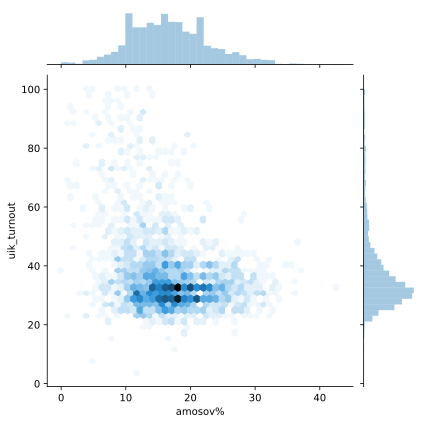

In [65]:
sns.jointplot(x=df['amosov%'], y=df['uik_turnout'], kind="hex")

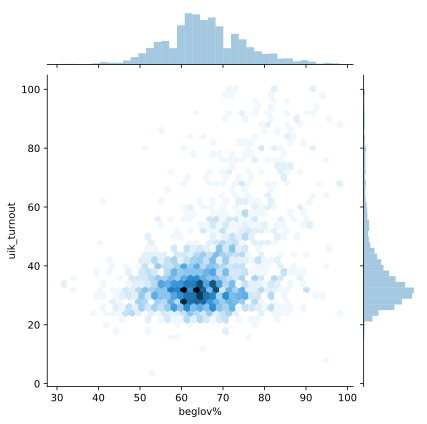

In [66]:
sns.jointplot(x=df['beglov%'], y=df['uik_turnout'], kind="hex")

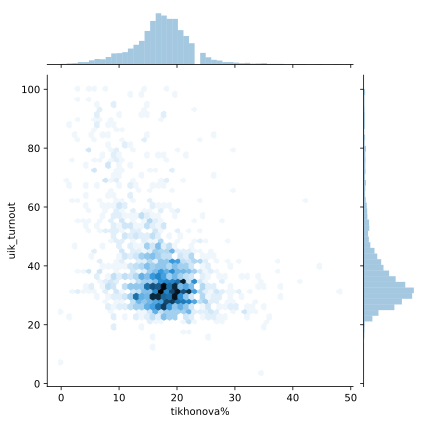

In [67]:
sns.jointplot(x=df['tikhonova%'], y=df['uik_turnout'], kind="hex")